In [1]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:

import random

import pickle



from datetime import datetime

In [62]:
import os
from pathlib import Path

from datetime import datetime

from tqdm import tqdm

In [4]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [49]:
# Utiliser la PCA pour réduire la dimensionnalité des embeddings à deux dimensions et visualiser les points
from sklearn.decomposition import PCA

# 1. Chargement des données

In [6]:
DATA_PATH = 'data/raw/'

In [9]:
[print(x) for x in os.listdir(DATA_PATH)];

articles_embeddings.pickle
articles_metadata.csv
clicks
clicks_sample.csv


* **articles_metadata.csv** : Fichier avec des metadatas sur les articles
* **articles_embeddings.pickle** : Article Content Embeddings (250-dimensional vectors)
* **clicks** : Dossier avec des fichiers de clics pour chaque heure.
* **clicks_sample.csv** : Exemple de fichier de clics.

## 1.1. Fichier : article_metadata

In [10]:
articles_metadata = pd.read_csv(DATA_PATH +'articles_metadata.csv')  

### 1.1.1. 1er tour

In [11]:
articles_metadata.head()

,article_id,category_id,created_at_ts,publisher_id,words_count
0,0,0,1513144419000,0,168
1,1,1,1405341936000,0,189
2,2,1,1408667706000,0,250
3,3,1,1408468313000,0,230
4,4,1,1407071171000,0,162


In [12]:
articles_metadata.sample(5)

,article_id,category_id,created_at_ts,publisher_id,words_count
320660,320660,433,1501177472000,0,168
127664,127664,252,1475747778000,0,154
264717,264717,398,1509713102000,0,122
314677,314677,431,1500232153000,0,187
191337,191337,305,1514367382000,0,113


In [13]:
articles_metadata.tail()

,article_id,category_id,created_at_ts,publisher_id,words_count
364042,364042,460,1434034118000,0,144
364043,364043,460,1434148472000,0,463
364044,364044,460,1457974279000,0,177
364045,364045,460,1515964737000,0,126
364046,364046,460,1505811330000,0,479


In [14]:
articles_metadata.describe()

,article_id,category_id,created_at_ts,publisher_id,words_count
count,364047.000000,364047.000000,3.640470e+05,364047.0,364047.000000
mean,182023.000000,283.108239,1.474070e+12,0.0,190.897727
std,105091.461061,136.723470,4.293038e+10,0.0,59.502766
min,0.000000,0.000000,1.159356e+12,0.0,0.000000
25%,91011.500000,199.000000,1.444925e+12,0.0,159.000000
50%,182023.000000,301.000000,1.489422e+12,0.0,186.000000
75%,273034.500000,399.000000,1.509891e+12,0.0,218.000000
max,364046.000000,460.000000,1.520943e+12,0.0,6690.000000


In [15]:
articles_metadata.shape

(364047, 5)

On a un jeu de données de 5 variables pour 364 047 articles.

Les 5 variables sont donc :

* **article_id**    : l'identifiant de l'article
* **category_id**   : l'identifiant de la catégorie
* **created_at_ts** : la date en millisecondes de la publication de l'article
* **publisher_id**  : l'identifiant de celui qui publie
* **words_cound**   : le nombre de mot de l'article

Observations :

* Il n'y a aucunes valeurs manquantes
* La colonne publisher_id est  vide
* les dates sont à reformater (timestamps Unix, qui correspondent au nombre de secondes écoulées depuis le 1er janvier 1970 à 00:00:00 UTC)
* Un article avec 0 mot ?


### 1.1.2. Premiers traitements

On peut supprimer la colonne publisher_id et reformater les dates

In [16]:
articles_metadata["created_at_ts"] = pd.to_datetime(articles_metadata["created_at_ts"], unit="ms")

Vérification de la première date

In [20]:
timestamp = 1513144419000
date = datetime.fromtimestamp(timestamp/1000.0)
print(date)

2017-12-13 06:53:39


In [21]:
articles_metadata.head(1)

,article_id,category_id,created_at_ts,publisher_id,words_count
0,0,0,2017-12-13 05:53:39,0,168


In [22]:
articles_metadata.drop(columns=["publisher_id"], inplace=True)

In [23]:
articles_metadata.dtypes

article_id                int64
category_id               int64
created_at_ts    datetime64[ns]
words_count               int64
dtype: object

In [24]:
articles_metadata.head(5)

,article_id,category_id,created_at_ts,words_count
0,0,0,2017-12-13 05:53:39,168
1,1,1,2014-07-14 12:45:36,189
2,2,1,2014-08-22 00:35:06,250
3,3,1,2014-08-19 17:11:53,230
4,4,1,2014-08-03 13:06:11,162


### 1.1.3. Variable "words_count"

In [25]:
print(articles_metadata[articles_metadata.words_count == 0].shape)
articles_metadata[articles_metadata.words_count == 0]

(35, 4)


,article_id,category_id,created_at_ts,words_count
35491,35491,43,2016-08-04 09:42:02,0
38472,38472,51,2011-04-21 21:22:43,0
39043,39043,64,2014-06-30 20:02:35,0
39054,39054,64,2015-01-21 21:30:33,0
164414,164414,288,2015-03-30 08:30:23,0
206233,206233,331,2017-09-30 17:11:56,0
212323,212323,343,2010-04-19 10:36:16,0
212324,212324,343,2010-04-16 18:49:55,0
212327,212327,343,2014-08-11 20:23:05,0
212526,212526,347,2018-01-28 19:38:55,0


35 articles sont indiqués comme vide, on peut penser que l'alimentation de la variable n'a pas fonctionné. On conserve les articles puisque cette variable n'est pas centrale.

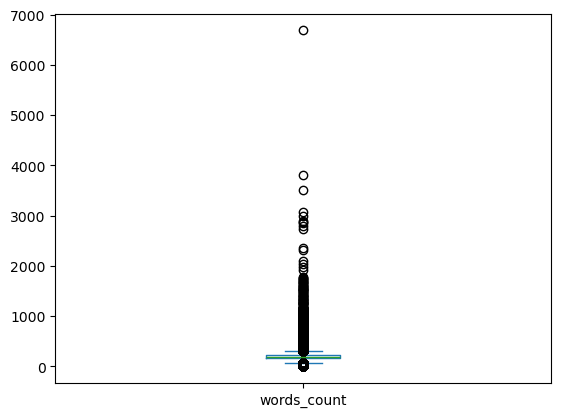

In [26]:
articles_metadata["words_count"].plot(kind="box")
plt.show()

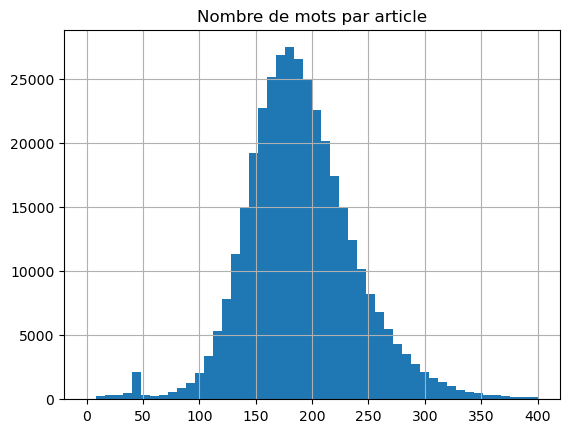

In [27]:
articles_metadata.words_count.hist(bins=50, range=(0,400))
plt.title('Nombre de mots par article');

### 1.1.4. Variable "created_at"

Date la plus ancienne : 2006-09-27 11:14:35
Date la plus récente : 2018-03-13 12:12:30




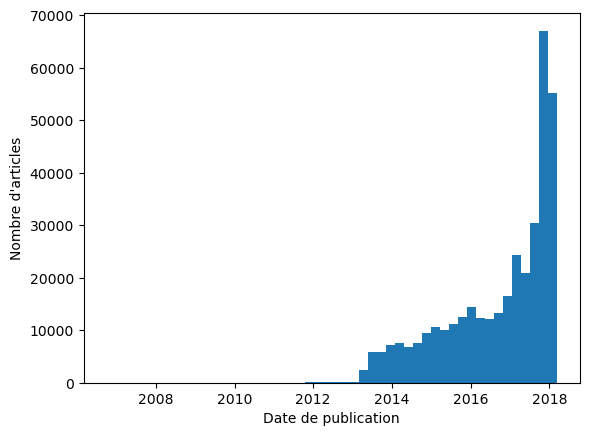

In [28]:
print("Date la plus ancienne :", articles_metadata["created_at_ts"].min())
print("Date la plus récente :", articles_metadata["created_at_ts"].max())
print("\n")

plt.hist(articles_metadata["created_at_ts"], bins=50)
plt.xlabel("Date de publication")
plt.ylabel("Nombre d'articles")
plt.show()

Assez peu d'articles avant 2013 et beaucoup à partir de 2017.

### 1.1.5. Variable category

In [29]:
category_counts = articles_metadata["category_id"].value_counts()
category_percent = articles_metadata["category_id"].value_counts(normalize=True)

Top 20 des catégories

In [30]:
category_percent[:20]

category_id
281    0.035207
375    0.027483
399    0.024857
412    0.023755
431    0.021313
428    0.021236
26     0.020170
7      0.018476
299    0.018223
301    0.017707
228    0.017638
442    0.016789
437    0.016528
118    0.015525
209    0.015424
354    0.015097
6      0.014328
136    0.014234
455    0.014114
174    0.013921
Name: proportion, dtype: float64

Environ 50 catégories correspondant à un seul article :

In [31]:
category_counts[-50:]

category_id
112    2
346    2
425    1
35     1
427    1
5      1
451    1
248    1
108    1
419    1
321    1
155    1
159    1
181    1
183    1
294    1
293    1
292    1
189    1
283    1
282    1
275    1
206    1
217    1
261    1
227    1
232    1
236    1
154    1
324    1
416    1
144    1
50     1
57     1
394    1
73     1
75     1
78     1
383    1
86     1
98     1
100    1
358    1
356    1
113    1
341    1
121    1
335    1
131    1
0      1
Name: count, dtype: int64

### 1.1.5. Valeurs manquantes

In [32]:
articles_metadata.isnull().sum()

article_id       0
category_id      0
created_at_ts    0
words_count      0
dtype: int64

### 1.1.6. Valeurs dupliquées

Sur l'identifiant, pas de duplication.

In [33]:
articles_metadata[articles_metadata.duplicated(subset=['article_id'])]

,article_id,category_id,created_at_ts,words_count


Maintenant regardons si des articles de la même catégorie ont été publiés en même temps avec un même nombre de mots :

In [34]:
duplicated_subset = ['category_id', 'created_at_ts', 'words_count']

In [35]:
articles_metadata[articles_metadata.duplicated(subset=duplicated_subset, keep=False)]

,article_id,category_id,created_at_ts,words_count
72668,72668,137,2017-11-05 08:00:02,148
72670,72670,137,2017-11-05 08:00:02,148
315523,315523,431,2015-01-29 00:00:01,204
315524,315524,431,2015-01-29 00:00:01,204
315618,315618,431,2015-02-04 00:00:01,208
315619,315619,431,2015-02-04 00:00:01,208
315854,315854,431,2015-02-14 00:00:02,214
315856,315856,431,2015-02-14 00:00:02,214
315859,315859,431,2015-02-17 01:00:02,193
315860,315860,431,2015-02-17 01:00:02,193


Les identifiants sont égalements très proches, soit deux nombres consécutifs, soit un nombre entre les deux.  
Les articles insérés entre deux duplicats à suivre :

In [36]:
articles_metadata.iloc[72669]

article_id                     72669
category_id                      137
created_at_ts    2017-11-19 07:50:02
words_count                      160
Name: 72669, dtype: object

In [37]:
articles_metadata.iloc[315855]

article_id                    315855
category_id                      431
created_at_ts    2015-02-14 00:00:02
words_count                      227
Name: 315855, dtype: object

Le nombre d'articles dupliqués ne semblent pas très important. On peut les supprimer sans pertes d'informations.  
On conservera le second duplicat dans l'hypothèse que l'article a été publié deux fois et qu'une modification légère a pu être appliquée.

In [38]:
duplicated_id = articles_metadata[articles_metadata.duplicated(subset=duplicated_subset, keep='last')]
duplicated_id

,article_id,category_id,created_at_ts,words_count
72668,72668,137,2017-11-05 08:00:02,148
315523,315523,431,2015-01-29 00:00:01,204
315618,315618,431,2015-02-04 00:00:01,208
315854,315854,431,2015-02-14 00:00:02,214
315859,315859,431,2015-02-17 01:00:02,193
315917,315917,431,2015-03-10 00:00:03,224


In [39]:
# articles_metadata.drop_duplicates(subset=duplicated_subset, keep='last', inplace=True)

In [40]:
articles_metadata

,article_id,category_id,created_at_ts,words_count
0,0,0,2017-12-13 05:53:39,168
1,1,1,2014-07-14 12:45:36,189
2,2,1,2014-08-22 00:35:06,250
3,3,1,2014-08-19 17:11:53,230
4,4,1,2014-08-03 13:06:11,162
...,...,...,...,...
364042,364042,460,2015-06-11 14:48:38,144
364043,364043,460,2015-06-12 22:34:32,463
364044,364044,460,2016-03-14 16:51:19,177
364045,364045,460,2018-01-14 21:18:57,126


<Axes: title={'center': 'Distribution of categories counts'}>

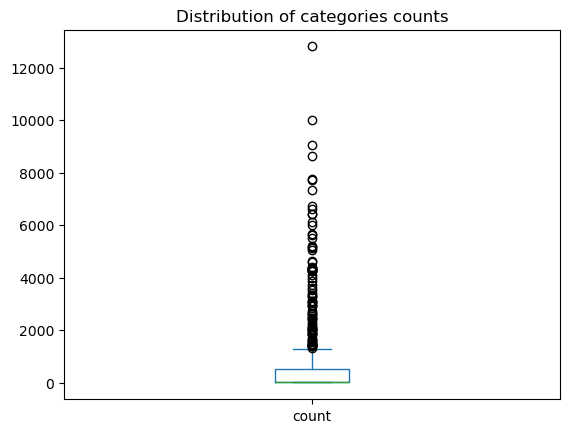

In [41]:
articles_metadata["category_id"].value_counts().plot(
    kind="box",
    x="category_id",
    title="Distribution of categories counts",
)

<Axes: title={'center': 'Distribution of categories'}, xlabel='category_id'>

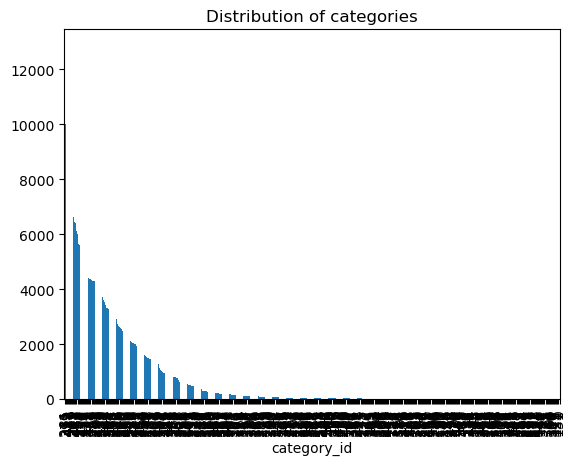

In [42]:
articles_metadata["category_id"].value_counts().plot(
    kind="bar",
    title="Distribution of categories",
)

In [43]:
articles_metadata["category_id"]

0           0
1           1
2           1
3           1
4           1
         ... 
364042    460
364043    460
364044    460
364045    460
364046    460
Name: category_id, Length: 364047, dtype: int64

## 1.2. Embedding

L'embedding doit correspondre aux articles présents dans articles_metadata. On a bien une ligne par article avec en colonne 250 mots.

In [46]:
NUM_EMBEDDINGS = 250
embeddings_df = pd.DataFrame(
    pd.read_pickle(Path(DATA_PATH, "articles_embeddings.pickle")),
    columns=["embedding_" + str(i) for i in range(NUM_EMBEDDINGS)],
    index=articles_metadata['article_id']
)

In [47]:
embeddings_df

,embedding_0,embedding_1,embedding_2,embedding_3,embedding_4,embedding_5,embedding_6,embedding_7,embedding_8,embedding_9,...,embedding_240,embedding_241,embedding_242,embedding_243,embedding_244,embedding_245,embedding_246,embedding_247,embedding_248,embedding_249
article_id,,,,,,,,,,,,,,,,,,,,,
0,-0.161183,-0.957233,-0.137944,0.050855,0.830055,0.901365,-0.335148,-0.559561,-0.500603,0.165183,...,0.321248,0.313999,0.636412,0.169179,0.540524,-0.813182,0.286870,-0.231686,0.597416,0.409623
1,-0.523216,-0.974058,0.738608,0.155234,0.626294,0.485297,-0.715657,-0.897996,-0.359747,0.398246,...,-0.487843,0.823124,0.412688,-0.338654,0.320787,0.588643,-0.594137,0.182828,0.397090,-0.834364
2,-0.619619,-0.972960,-0.207360,-0.128861,0.044748,-0.387535,-0.730477,-0.066126,-0.754899,-0.242004,...,0.454756,0.473184,0.377866,-0.863887,-0.383365,0.137721,-0.810877,-0.447580,0.805932,-0.285284
3,-0.740843,-0.975749,0.391698,0.641738,-0.268645,0.191745,-0.825593,-0.710591,-0.040099,-0.110514,...,0.271535,0.036040,0.480029,-0.763173,0.022627,0.565165,-0.910286,-0.537838,0.243541,-0.885329
4,-0.279052,-0.972315,0.685374,0.113056,0.238315,0.271913,-0.568816,0.341194,-0.600554,-0.125644,...,0.238286,0.809268,0.427521,-0.615932,-0.503697,0.614450,-0.917760,-0.424061,0.185484,-0.580292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364042,-0.055038,-0.962136,0.869436,-0.071523,-0.725294,0.434320,0.198312,-0.581154,0.702346,-0.124813,...,-0.410549,0.564252,-0.463959,0.167907,-0.480068,0.652090,0.380880,0.433195,-0.662455,-0.222850
364043,-0.136932,-0.995471,0.991298,0.031871,-0.915622,-0.658517,0.633090,-0.564356,0.676551,-0.446068,...,-0.681986,-0.574185,-0.536908,0.688934,0.528204,0.162435,0.940364,0.989298,-0.761595,-0.414652
364044,-0.251390,-0.976243,0.586097,0.643631,-0.663359,-0.093480,0.691553,-0.588281,0.902999,0.124571,...,-0.162220,-0.242030,-0.476131,0.352132,-0.311279,0.460574,-0.653077,-0.143725,0.068093,-0.705010


C:\Users\Raphael\anaconda3\envs\RecSys\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Raphael\anaconda3\envs\RecSys\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Raphael\anaconda3\envs\RecSys\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


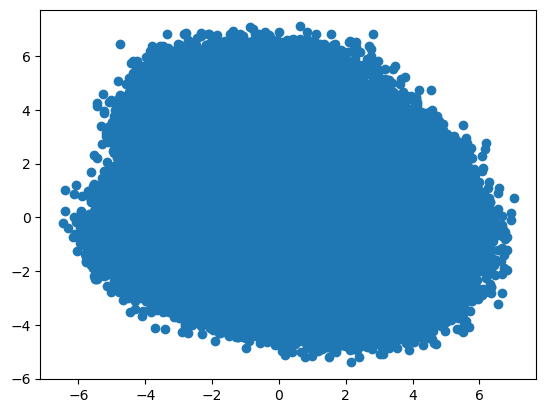

In [50]:
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings_df)

plt.scatter(embeddings_2d[:,0], embeddings_2d[:,1])
plt.show()

## 1.3. Dossier "clicks"

In [51]:
CLICK_FILES_PATH = DATA_PATH + "clicks/clicks/"

#Get all .csv contain in clicks folder
click_files = [CLICK_FILES_PATH + x for x in os.listdir(CLICK_FILES_PATH)];

#Sort all files PATH contain in list.
click_files.sort()

In [52]:
print("Nombre de fichier : ", len(click_files))

Nombre de fichier :  385


### 1.3.1. Un fichier

In [53]:
clicks_hour_000 = pd.read_csv(CLICK_FILES_PATH + 'clicks_hour_000.csv')  

In [54]:
clicks_hour_000.dtypes

user_id                int64
session_id             int64
session_start          int64
session_size           int64
click_article_id       int64
click_timestamp        int64
click_environment      int64
click_deviceGroup      int64
click_os               int64
click_country          int64
click_region           int64
click_referrer_type    int64
dtype: object

In [55]:
clicks_hour_000.head()

,user_id,session_id,session_start,session_size,click_article_id,click_timestamp,click_environment,click_deviceGroup,click_os,click_country,click_region,click_referrer_type
0,0,1506825423271737,1506825423000,2,157541,1506826828020,4,3,20,1,20,2
1,0,1506825423271737,1506825423000,2,68866,1506826858020,4,3,20,1,20,2
2,1,1506825426267738,1506825426000,2,235840,1506827017951,4,1,17,1,16,2
3,1,1506825426267738,1506825426000,2,96663,1506827047951,4,1,17,1,16,2
4,2,1506825435299739,1506825435000,2,119592,1506827090575,4,1,17,1,24,2


In [56]:
clicks_hour_000.tail()

,user_id,session_id,session_start,session_size,click_article_id,click_timestamp,click_environment,click_deviceGroup,click_os,click_country,click_region,click_referrer_type
1878,705,1506828968165442,1506828968000,2,119592,1506830912301,4,1,17,1,21,2
1879,705,1506828968165442,1506828968000,2,284847,1506830942301,4,1,17,1,21,2
1880,706,1506828979881443,1506828979000,3,108854,1506829027334,4,3,2,1,25,1
1881,706,1506828979881443,1506828979000,3,96663,1506829095732,4,3,2,1,25,1
1882,706,1506828979881443,1506828979000,3,68866,1506829125732,4,3,2,1,25,1


In [57]:
clicks_hour_000.describe()

,user_id,session_id,session_start,session_size,click_article_id,click_timestamp,click_environment,click_deviceGroup,click_os,click_country,click_region,click_referrer_type
count,1883.000000,1.883000e+03,1.883000e+03,1883.000000,1883.000000,1.883000e+03,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000
mean,355.893787,1.506828e+15,1.506828e+12,3.459904,176717.848646,1.506830e+12,3.917153,2.305895,12.113648,1.491768,18.774827,1.764206
std,206.162865,8.679628e+08,8.679468e+05,3.037467,82324.177259,1.064938e+07,0.410461,1.062301,7.825735,2.007772,7.083400,1.225679
min,0.000000,1.506825e+15,1.506825e+12,2.000000,2137.000000,1.506827e+12,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000
25%,181.500000,1.506827e+15,1.506827e+12,2.000000,108854.000000,1.506828e+12,4.000000,1.000000,2.000000,1.000000,13.000000,1.000000
50%,353.000000,1.506828e+15,1.506828e+12,3.000000,157541.000000,1.506828e+12,4.000000,3.000000,17.000000,1.000000,21.000000,1.000000
75%,537.000000,1.506828e+15,1.506828e+12,4.000000,236697.500000,1.506829e+12,4.000000,3.000000,19.000000,1.000000,25.000000,2.000000
max,706.000000,1.506829e+15,1.506829e+12,24.000000,363291.000000,1.506998e+12,4.000000,4.000000,20.000000,11.000000,28.000000,7.000000


Explication des colonnes :

* **click_timestamp** : date du clic 
* **user_id** : identifiant de l'utilisateur
* **session_id** : identifiant de la session utilisateur
* **session_start** : date de début de la session
* **session_size** : nombre de clic au cours de la session
* **click_article_id** : identifiant de l'article cliqué
* **click_environment** : Id of the Environment: 1 - Facebook Instant Article, 2 - Mobile App, 3 - AMP (Accelerated Mobile Pages), 4 - Web
* **click_deviceGroup** : Id of the Device Type: 1 - Tablet, 2 - TV, 3 - Empty, 4 - Mobile, 5 - Desktop
* **click_os** : système d'exploitation de l'appareil (1 à 20) : 1 - Other, 2 - iOS, 3 - Android, 4 - Windows Phone, 5 - Windows Mobile, 6 - Windows, 7 - etc 
* **click_country** : Le pays de provenance de l'utilisateur
* **click_region** : 
* **click_referrer_type** : 

# 2. Construction du jeu de données

On se limite à 20 fichiers pour l'instant

In [58]:
NUM_CLICK_FILES = 20

In [59]:
selected_click_files = click_files[:NUM_CLICK_FILES]
selected_click_files

['data/raw/clicks/clicks/clicks_hour_000.csv',
 'data/raw/clicks/clicks/clicks_hour_001.csv',
 'data/raw/clicks/clicks/clicks_hour_002.csv',
 'data/raw/clicks/clicks/clicks_hour_003.csv',
 'data/raw/clicks/clicks/clicks_hour_004.csv',
 'data/raw/clicks/clicks/clicks_hour_005.csv',
 'data/raw/clicks/clicks/clicks_hour_006.csv',
 'data/raw/clicks/clicks/clicks_hour_007.csv',
 'data/raw/clicks/clicks/clicks_hour_008.csv',
 'data/raw/clicks/clicks/clicks_hour_009.csv',
 'data/raw/clicks/clicks/clicks_hour_010.csv',
 'data/raw/clicks/clicks/clicks_hour_011.csv',
 'data/raw/clicks/clicks/clicks_hour_012.csv',
 'data/raw/clicks/clicks/clicks_hour_013.csv',
 'data/raw/clicks/clicks/clicks_hour_014.csv',
 'data/raw/clicks/clicks/clicks_hour_015.csv',
 'data/raw/clicks/clicks/clicks_hour_016.csv',
 'data/raw/clicks/clicks/clicks_hour_017.csv',
 'data/raw/clicks/clicks/clicks_hour_018.csv',
 'data/raw/clicks/clicks/clicks_hour_019.csv']

In [64]:
clicks = pd.concat(
    [
        pd.read_csv(click_file_path)
        for click_file_path in tqdm(selected_click_files)
    ],
    sort=False,
    ignore_index=True,
    verify_integrity=True,
)

100%|██████████| 20/20 [00:00<00:00, 197.97it/s]


In [66]:
def timestamp_to_datetime(x):
    return datetime.fromtimestamp(int(int(x) / 1000))

clicks["session_start"] = pd.to_datetime(clicks["session_start"].apply(timestamp_to_datetime))
clicks["click_timestamp"] = pd.to_datetime(clicks["click_timestamp"].apply(timestamp_to_datetime))

In [68]:
clicks.dtypes

user_id                         int64
session_id                      int64
session_start          datetime64[ns]
session_size                    int64
click_article_id                int64
click_timestamp        datetime64[ns]
click_environment               int64
click_deviceGroup               int64
click_os                        int64
click_country                   int64
click_region                    int64
click_referrer_type             int64
dtype: object

In [69]:
clicks.isnull().sum()

user_id                0
session_id             0
session_start          0
session_size           0
click_article_id       0
click_timestamp        0
click_environment      0
click_deviceGroup      0
click_os               0
click_country          0
click_region           0
click_referrer_type    0
dtype: int64

## 2.1. Type de variables

In [70]:
clicks.dtypes

user_id                         int64
session_id                      int64
session_start          datetime64[ns]
session_size                    int64
click_article_id                int64
click_timestamp        datetime64[ns]
click_environment               int64
click_deviceGroup               int64
click_os                        int64
click_country                   int64
click_region                    int64
click_referrer_type             int64
dtype: object

In [71]:
articles_metadata.dtypes

article_id                int64
category_id               int64
created_at_ts    datetime64[ns]
words_count               int64
dtype: object

In [72]:
articles_metadata.shape

(364047, 4)

## 2.2. Filtrer les users

On filtre les utilisateurs avec trop peu d'interactions

In [73]:
list_users_id = clicks.user_id.unique()
print("Le nombre d'utilisateurs est de :", len(list_users_id))

Le nombre d'utilisateurs est de : 27911


In [74]:
clicks.user_id.value_counts()[clicks.user_id.value_counts()>=5]

user_id
5890     68
9261     51
15275    45
681      36
852      33
         ..
594       5
2517      5
1572      5
624       5
23295     5
Name: count, Length: 3169, dtype: int64

In [75]:
users_with_5_interactions = pd.DataFrame(clicks.user_id.value_counts()[clicks.user_id.value_counts()>=5].index, columns=['user_id'])

In [76]:
filtered_users_ids = clicks.user_id.value_counts()[clicks.user_id.value_counts()>=5].index
print("Le nombre d'utilisateurs avec 5 interactions ou plus :", len(filtered_users_ids))

Le nombre d'utilisateurs avec 5 interactions ou plus : 3169


In [77]:
print("Nombre d'intercations totales:", len(clicks))

Nombre d'intercations totales: 81245


In [78]:
filtered_clicks_5 = clicks.merge(users_with_5_interactions, how = 'right', left_on = 'user_id', right_on = 'user_id')

In [79]:
print("Nombre d'interactions avec les utilisateurs avec plus de 5 interactions: ", len(filtered_clicks_5))

Nombre d'interactions avec les utilisateurs avec plus de 5 interactions:  21731


In [80]:
filtered_clicks_5.rename(columns={'click_article_id': 'article_id'}, inplace=True)

#### Vérification

In [81]:
filtered_clicks_5.user_id.value_counts()

user_id
5890     68
9261     51
15275    45
681      36
852      33
         ..
20554     5
10249     5
20665     5
3395      5
23295     5
Name: count, Length: 3169, dtype: int64

## 2.3. Fichier interactions

In [82]:
filtered_clicks_5['click'] = 1

In [83]:
filtered_clicks_5

,user_id,session_id,session_start,session_size,article_id,click_timestamp,click_environment,click_deviceGroup,click_os,click_country,click_region,click_referrer_type,click
0,5890,1506857592200716,2017-10-01 13:33:12,6,59704,2017-10-01 13:33:14,4,1,17,1,8,7,1
1,5890,1506857592200716,2017-10-01 13:33:12,6,59431,2017-10-01 13:33:14,4,1,17,1,8,7,1
2,5890,1506857592200716,2017-10-01 13:33:12,6,68866,2017-10-01 13:33:58,4,1,17,1,8,7,1
3,5890,1506857592200716,2017-10-01 13:33:12,6,195106,2017-10-01 13:34:57,4,1,17,1,8,7,1
4,5890,1506857592200716,2017-10-01 13:33:12,6,353724,2017-10-01 13:34:57,4,1,17,1,8,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21726,23295,1506890556482117,2017-10-01 22:42:36,5,284463,2017-10-01 22:45:11,4,3,2,1,21,2,1
21727,23295,1506890556482117,2017-10-01 22:42:36,5,242485,2017-10-01 22:48:52,4,3,2,1,21,1,1
21728,23295,1506890556482117,2017-10-01 22:42:36,5,96663,2017-10-01 22:52:13,4,3,2,1,21,2,1
21729,23295,1506890556482117,2017-10-01 22:42:36,5,265147,2017-10-01 22:54:08,4,3,2,1,21,1,1


In [84]:
interactions_df = filtered_clicks_5.groupby(['user_id', 'article_id'])['click'].sum().reset_index()
interactions_df.head()

,user_id,article_id,click
0,3,233769,1
1,3,234686,1
2,3,235665,1
3,3,236065,1
4,3,236294,1


In [85]:
assert interactions_df.click.sum() == len(filtered_clicks_5)

## 2.4. Fichier articles avec embedding

In [86]:
articles_df = pd.concat([articles_metadata, embeddings_df], axis=1)

In [87]:
articles_df = articles_df.set_index('article_id')

## 2.6. Limiter le fichier des articles aux articles cliqués

On limite aux articles de notre fichier d'interactions

In [90]:
interacted_article_ids = list(set(interactions_df['article_id']))
len(interacted_article_ids)

1842

In [91]:
articles_min_df = articles_df.loc[interacted_article_ids]
articles_min_df

,category_id,created_at_ts,words_count,embedding_0,embedding_1,embedding_2,embedding_3,embedding_4,embedding_5,embedding_6,...,embedding_240,embedding_241,embedding_242,embedding_243,embedding_244,embedding_245,embedding_246,embedding_247,embedding_248,embedding_249
article_id,,,,,,,,,,,,,,,,,,,,,
319488,433,2017-09-29 15:47:18,157,-0.466458,-0.964679,-0.485105,-0.877867,0.391511,0.483561,0.005480,...,-0.814141,-0.442375,0.039461,0.395648,-0.747964,-0.382282,-0.632840,-0.387871,-0.056827,-0.199358
360463,455,2017-10-01 10:01:03,176,-0.602885,-0.961464,-0.565603,-0.649518,-0.559716,0.524595,-0.370100,...,-0.585967,-0.653178,-0.195667,0.249913,0.331547,0.119053,0.659684,-0.244358,-0.151648,0.401354
360465,455,2017-10-01 13:13:54,114,-0.205855,-0.957574,-0.878344,-0.431890,-0.693044,0.168474,-0.385850,...,-0.557692,-0.653369,-0.120972,-0.227757,0.475501,0.446490,0.455878,-0.210448,-0.116186,0.585806
106520,228,2017-08-11 21:11:33,112,0.505829,-0.931578,-0.277545,0.383692,-0.603157,0.135672,-0.137240,...,0.267274,-0.060965,0.684367,-0.198938,-0.601258,0.362214,0.370468,0.369780,0.006491,0.607185
180261,301,2016-11-19 13:30:13,199,-0.631314,-0.972719,0.554279,0.087726,0.090802,0.394112,0.057570,...,0.300368,-0.433697,-0.092218,-0.694479,0.208018,-0.244026,0.054419,-0.172014,0.355977,-0.357948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32730,26,2017-05-09 17:45:00,187,-0.063069,-0.963189,-0.020831,0.328858,0.314361,-0.227227,0.389601,...,0.528567,0.427474,0.461421,-0.461597,-0.333884,0.534221,-0.199299,-0.593895,0.302743,-0.524815
352227,442,2017-08-01 19:20:39,151,-0.037319,-0.970653,0.235284,-0.792944,-0.652155,-0.429864,0.559105,...,-0.535248,-0.867873,-0.768359,0.483744,0.029526,0.570641,0.170771,-0.608991,0.154890,0.234986
311282,431,2016-03-15 13:03:49,183,-0.320332,-0.972268,0.788268,-0.835453,-0.814294,0.650294,0.580025,...,-0.786265,-0.272901,-0.877875,0.703472,-0.748671,0.258157,-0.033027,0.110924,-0.687876,-0.688037


# Exports

In [92]:
PREPROCESS_DATA_PATH = 'data/1_preprocessed/'

In [93]:
interactions_df.to_csv(PREPROCESS_DATA_PATH + 'interactions_df.csv')

In [94]:
articles_min_df.to_csv(PREPROCESS_DATA_PATH + 'articles_min.csv')